### Autograd in Pytorch

In [1]:
import random

import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print(x.grad.data) #Prints '3' which is dz/dx 

tensor(3.)


In [2]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y
z.backward()

print ("dz/dx=",y,x.grad.data)

dz/dx= tensor(2.) tensor(2.)


In [3]:
import torch

a = torch.tensor([1., 3.], requires_grad=True)
b = torch.tensor([-3., 4.], requires_grad=True)
c = torch.tensor([2.,1.], requires_grad=True)
Q = (a**2 + b**2)*c
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)
# check if collected gradients are correct
print(2*a*c == a.grad)
print(a**2 + b**2 == b.grad)
print(2*c*b == c.grad)
print (2*a)
print (a.grad.data)

tensor([True, True])
tensor([False, False])
tensor([False, False])
tensor([2., 6.], grad_fn=<MulBackward0>)
tensor([4., 6.])


### Linear Regression

In [77]:
import numpy as np# create dummy data for training
import random
x_values = [i for i in np.arange(0,25,0.1)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

# y = 2*x + 1 

y_values = [2*i + 1 for i in x_values]
y_values_noise = [(i + random.uniform(0,2)) for i in x_values]

y_train = np.array(y_values_noise, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

print (x_train.shape, y_train.shape)

import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.0001 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
losses = []


for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))
    losses.append(loss.item())
    
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)



(250, 1) (250, 1)
tensor(157.1615, grad_fn=<MseLossBackward0>)
epoch 0, loss 157.1614990234375
tensor(144.3936, grad_fn=<MseLossBackward0>)
epoch 1, loss 144.39364624023438
tensor(132.6652, grad_fn=<MseLossBackward0>)
epoch 2, loss 132.66519165039062
tensor(121.8915, grad_fn=<MseLossBackward0>)
epoch 3, loss 121.8914794921875
tensor(111.9948, grad_fn=<MseLossBackward0>)
epoch 4, loss 111.99481201171875
tensor(102.9038, grad_fn=<MseLossBackward0>)
epoch 5, loss 102.90379333496094
tensor(94.5528, grad_fn=<MseLossBackward0>)
epoch 6, loss 94.55284881591797
tensor(86.8817, grad_fn=<MseLossBackward0>)
epoch 7, loss 86.88172149658203
tensor(79.8350, grad_fn=<MseLossBackward0>)
epoch 8, loss 79.83504486083984
tensor(73.3620, grad_fn=<MseLossBackward0>)
epoch 9, loss 73.36204528808594
tensor(67.4160, grad_fn=<MseLossBackward0>)
epoch 10, loss 67.41598510742188
tensor(61.9539, grad_fn=<MseLossBackward0>)
epoch 11, loss 61.95393753051758
tensor(56.9366, grad_fn=<MseLossBackward0>)
epoch 12, loss

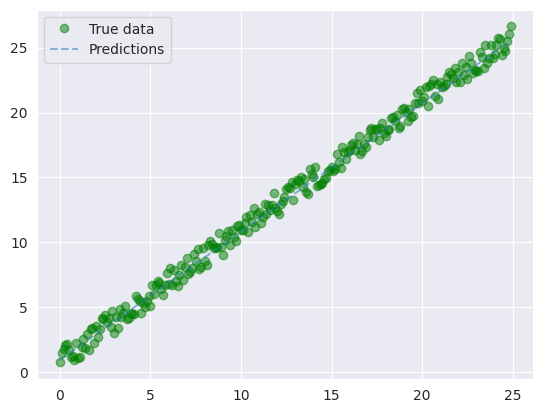

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

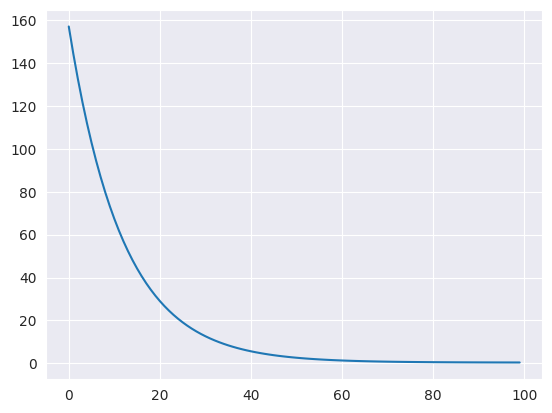

In [79]:
plt.plot(range(0,epoch + 1), losses)

In [69]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9549]])),
             ('linear.bias', tensor([0.9884]))])

### Logistic regression

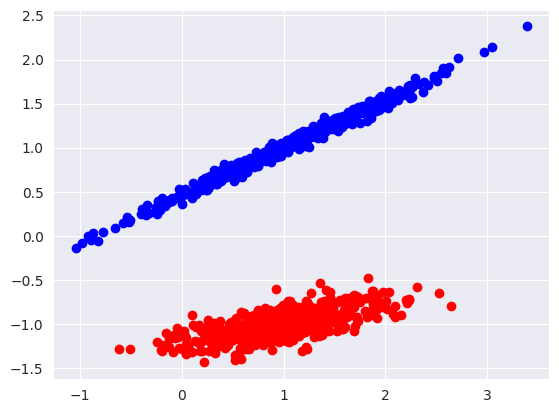

(1000, 2)
(1000,)


100%|██████████| 10000/10000 [00:04<00:00, 2307.54it/s]


In [33]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import torch


#matplotlib.rc('text', usetex = True)
#matplotlib.rc('font', **{'family' : "sans-serif"})
#params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
#plt.rcParams.update(params)

#sns.set_style('darkgrid')


from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a random dataset, but linearly separable!!!
separable = False
while not separable:
    samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y=0)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:,k].max() < blue[:,k].min() or red[:,k].min() > blue[:,k].max() for k in range(2)])
    #print (separable)



plt.scatter(red[:,0], red[:,1], c='red', label='Class 0')
plt.scatter(blue[:,0], blue[:,1], c='blue', label='Class 1')
plt.show()

red_labels = np.zeros(len(red))
blue_labels = np.ones(len(blue))

labels = np.append(red_labels, blue_labels)
inputs = np.concatenate((red, blue), axis=0)

print (inputs.shape)
print (labels.shape)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(inputs, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.1, random_state=69)

class LogisticRegression (torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out
    
epochs = 10000
input_dim = 2 # two features x1, x2
output_dim = 1
learning_rate = 0.01

model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_test).float()
y_val = torch.from_numpy(y_test).float()

losses = []
losses_val = []

iters = []

iter = 0

for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), y_train)
    loss.backward()
    optimizer.step()
    iter += 1
    if iter % 1000 == 0:
        with torch.no_grad():
            
            outputs_val = model(X_val)
            loss_val = criterion(torch.squeeze(outputs_val), y_val)
            losses_val.append(loss_val.item())

            losses.append(loss.item())
            iters.append(iter)

            #print('Iteration: {}. Loss: {}. Val Loss: {}'.format(iter, loss.item(), loss_val.item()))

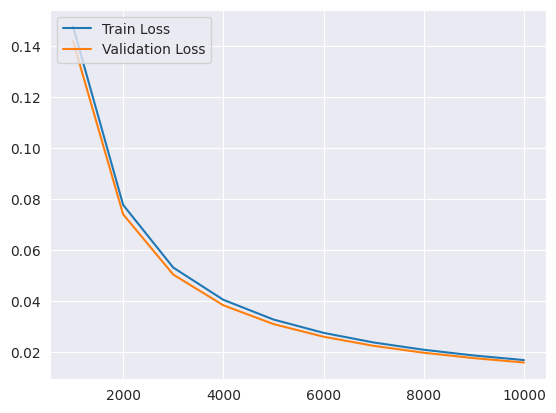

In [34]:
plt.clf()
plt.plot(iters, losses, label='Train Loss')
plt.plot(iters, losses_val, label='Validation Loss')
plt.legend(loc="upper left")
plt.show()

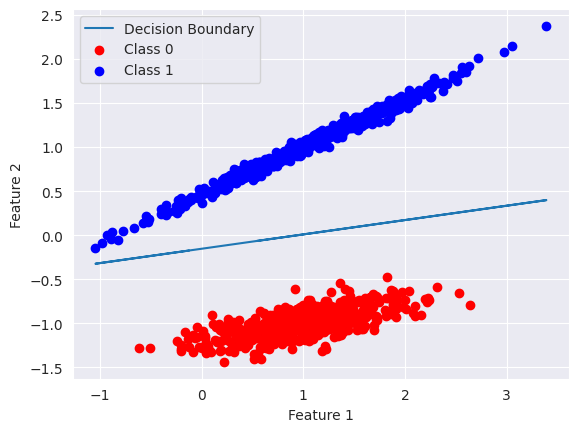

In [35]:
x1 = X_train[:, 0]  
x0 = X_train[:, 1]  

# Extracting model parameters
w1 = model.state_dict()['linear.weight'][0][0]
w2 = model.state_dict()['linear.weight'][0][1]
b = model.state_dict()['linear.bias'][0]

plt.plot(x1, (-b - w1 * x1) / w2, label='Decision Boundary')

# Plotting scatter plot for each class
plt.scatter(red[:, 0], red[:, 1], c='red', label='Class 0')
plt.scatter(blue[:, 0], blue[:, 1], c='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Shallow neural network

(4000, 2)
(4000,)


Text(0, 0.5, 'feature 2')

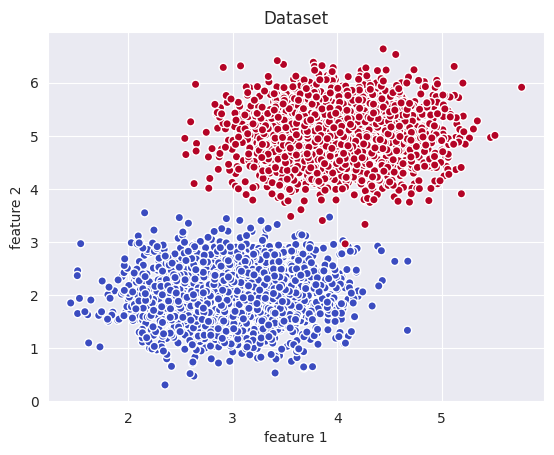

In [36]:
# Necessary imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# This line detects if we have a gpu support on our system
device = ("cuda" if torch.cuda.is_available() else "cpu")

x1 = np.random.randn(2000)*0.5+3
x2 = np.random.randn(2000)*0.5+2

x3 = np.random.randn(2000) *0.5 + 4
x4 = np.random.randn(2000) *0.5 + 5

# Creating a Matrix
X_1 = np.vstack([x1, x2])
X_2 = np.vstack([x3, x4])
X = np.hstack([X_1, X_2]).T

# Creating a vector that contains classes (0, 1)
y = np.hstack([np.zeros(2000), np.ones(2000)])

print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm, edgecolors='w');
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# converting the datatypes from numpy array into tensors of type float
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)

y_train = torch.from_numpy(y_train.squeeze()).type(torch.FloatTensor).view(-1, 1)
y_test = torch.from_numpy(y_test.squeeze()).type(torch.FloatTensor).view(-1, 1)

# checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([3200, 2])
torch.Size([800, 2])
torch.Size([3200, 1])
torch.Size([800, 1])


## Model definition

In [38]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(ShallowNeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_num, hidden_num) # hidden layer
        self.output = nn.Linear(hidden_num, output_num) # output layer
        #self.sigmoid = nn.Sigmoid() # sigmoid activation function
        self.relu = nn.ReLU() # relu activation function
    
    def forward(self, x):
        x = self.relu(self.hidden(x)) 
        out = self.output(x)
        return out

input_num = 2
hidden_num = 2
output_num = 1 # The output should be the same as the number of classes

model = ShallowNeuralNetwork(input_num, hidden_num, output_num)
model.to(device) # send our model to gpu if available else cpu. 
print(model)

ShallowNeuralNetwork(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


## Training cycle

In [39]:
!pip install tqdm
from tqdm import tqdm

criterion = torch.nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

if torch.cuda.is_available():
    X_train = Variable(X_train).cuda()
    y_train = Variable(y_train).cuda()
    X_test = Variable(X_test).cuda()
    y_test = Variable(y_test).cuda()

num_epochs = 1000



total_acc, total_loss = [], []

for epoch in tqdm(range(num_epochs)):
    # forward propagation
    model.train()

    y_pred = model(X_train)
    pred = np.where(y_pred.cpu() > 0.5, 1, 0)
    loss = criterion(y_pred, y_train)
    
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


    print('Epoch [{}/{}], Train Loss: {:.5f},'.format(epoch, num_epochs, loss.item()))
print('\nTraining Complete')

Defaulting to user installation because normal site-packages is not writeable


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [0/1000], Train Loss: 0.71890,
Epoch [1/1000], Train Loss: 0.70376,
Epoch [2/1000], Train Loss: 0.69830,
Epoch [3/1000], Train Loss: 0.69626,
Epoch [4/1000], Train Loss: 0.69530,


 11%|█         | 112/1000 [00:00<00:01, 636.45it/s]

Epoch [5/1000], Train Loss: 0.69472,
Epoch [6/1000], Train Loss: 0.69438,
Epoch [7/1000], Train Loss: 0.69417,
Epoch [8/1000], Train Loss: 0.69403,
Epoch [9/1000], Train Loss: 0.69392,
Epoch [10/1000], Train Loss: 0.69385,
Epoch [11/1000], Train Loss: 0.69379,
Epoch [12/1000], Train Loss: 0.69374,
Epoch [13/1000], Train Loss: 0.69370,
Epoch [14/1000], Train Loss: 0.69366,
Epoch [15/1000], Train Loss: 0.69362,
Epoch [16/1000], Train Loss: 0.69359,
Epoch [17/1000], Train Loss: 0.69357,
Epoch [18/1000], Train Loss: 0.69354,
Epoch [19/1000], Train Loss: 0.69352,
Epoch [20/1000], Train Loss: 0.69350,
Epoch [21/1000], Train Loss: 0.69348,
Epoch [22/1000], Train Loss: 0.69346,
Epoch [23/1000], Train Loss: 0.69345,
Epoch [24/1000], Train Loss: 0.69343,
Epoch [25/1000], Train Loss: 0.69342,
Epoch [26/1000], Train Loss: 0.69341,
Epoch [27/1000], Train Loss: 0.69340,
Epoch [28/1000], Train Loss: 0.69338,
Epoch [29/1000], Train Loss: 0.69337,
Epoch [30/1000], Train Loss: 0.69336,
Epoch [31/1000], 

 34%|███▍      | 339/1000 [00:00<00:00, 964.68it/s]

Epoch [219/1000], Train Loss: 0.69315,
Epoch [220/1000], Train Loss: 0.69315,
Epoch [221/1000], Train Loss: 0.69315,
Epoch [222/1000], Train Loss: 0.69315,
Epoch [223/1000], Train Loss: 0.69315,
Epoch [224/1000], Train Loss: 0.69315,
Epoch [225/1000], Train Loss: 0.69315,
Epoch [226/1000], Train Loss: 0.69315,
Epoch [227/1000], Train Loss: 0.69315,
Epoch [228/1000], Train Loss: 0.69315,
Epoch [229/1000], Train Loss: 0.69315,
Epoch [230/1000], Train Loss: 0.69315,
Epoch [231/1000], Train Loss: 0.69315,
Epoch [232/1000], Train Loss: 0.69315,
Epoch [233/1000], Train Loss: 0.69315,
Epoch [234/1000], Train Loss: 0.69315,
Epoch [235/1000], Train Loss: 0.69315,
Epoch [236/1000], Train Loss: 0.69315,
Epoch [237/1000], Train Loss: 0.69315,
Epoch [238/1000], Train Loss: 0.69315,
Epoch [239/1000], Train Loss: 0.69315,
Epoch [240/1000], Train Loss: 0.69315,
Epoch [241/1000], Train Loss: 0.69315,
Epoch [242/1000], Train Loss: 0.69315,
Epoch [243/1000], Train Loss: 0.69315,
Epoch [244/1000], Train L

 58%|█████▊    | 583/1000 [00:00<00:00, 1108.18it/s]

Epoch [456/1000], Train Loss: 0.69315,
Epoch [457/1000], Train Loss: 0.69315,
Epoch [458/1000], Train Loss: 0.69315,
Epoch [459/1000], Train Loss: 0.69315,
Epoch [460/1000], Train Loss: 0.69315,
Epoch [461/1000], Train Loss: 0.69315,
Epoch [462/1000], Train Loss: 0.69315,
Epoch [463/1000], Train Loss: 0.69315,
Epoch [464/1000], Train Loss: 0.69315,
Epoch [465/1000], Train Loss: 0.69315,
Epoch [466/1000], Train Loss: 0.69315,
Epoch [467/1000], Train Loss: 0.69315,
Epoch [468/1000], Train Loss: 0.69315,
Epoch [469/1000], Train Loss: 0.69315,
Epoch [470/1000], Train Loss: 0.69315,
Epoch [471/1000], Train Loss: 0.69315,
Epoch [472/1000], Train Loss: 0.69315,
Epoch [473/1000], Train Loss: 0.69315,
Epoch [474/1000], Train Loss: 0.69315,
Epoch [475/1000], Train Loss: 0.69315,
Epoch [476/1000], Train Loss: 0.69315,
Epoch [477/1000], Train Loss: 0.69315,
Epoch [478/1000], Train Loss: 0.69314,
Epoch [479/1000], Train Loss: 0.69314,
Epoch [480/1000], Train Loss: 0.69314,
Epoch [481/1000], Train L

 83%|████████▎ | 830/1000 [00:00<00:00, 1148.96it/s]

Epoch [707/1000], Train Loss: 0.69314,
Epoch [708/1000], Train Loss: 0.69314,
Epoch [709/1000], Train Loss: 0.69314,
Epoch [710/1000], Train Loss: 0.69314,
Epoch [711/1000], Train Loss: 0.69314,
Epoch [712/1000], Train Loss: 0.69314,
Epoch [713/1000], Train Loss: 0.69314,
Epoch [714/1000], Train Loss: 0.69314,
Epoch [715/1000], Train Loss: 0.69314,
Epoch [716/1000], Train Loss: 0.69314,
Epoch [717/1000], Train Loss: 0.69314,
Epoch [718/1000], Train Loss: 0.69314,
Epoch [719/1000], Train Loss: 0.69314,
Epoch [720/1000], Train Loss: 0.69314,
Epoch [721/1000], Train Loss: 0.69314,
Epoch [722/1000], Train Loss: 0.69314,
Epoch [723/1000], Train Loss: 0.69314,
Epoch [724/1000], Train Loss: 0.69314,
Epoch [725/1000], Train Loss: 0.69314,
Epoch [726/1000], Train Loss: 0.69314,
Epoch [727/1000], Train Loss: 0.69314,
Epoch [728/1000], Train Loss: 0.69314,
Epoch [729/1000], Train Loss: 0.69314,
Epoch [730/1000], Train Loss: 0.69314,
Epoch [731/1000], Train Loss: 0.69314,
Epoch [732/1000], Train L

100%|██████████| 1000/1000 [00:00<00:00, 1042.66it/s]

Epoch [944/1000], Train Loss: 0.69314,
Epoch [945/1000], Train Loss: 0.69314,
Epoch [946/1000], Train Loss: 0.69314,
Epoch [947/1000], Train Loss: 0.69314,
Epoch [948/1000], Train Loss: 0.69314,
Epoch [949/1000], Train Loss: 0.69314,
Epoch [950/1000], Train Loss: 0.69314,
Epoch [951/1000], Train Loss: 0.69314,
Epoch [952/1000], Train Loss: 0.69314,
Epoch [953/1000], Train Loss: 0.69314,
Epoch [954/1000], Train Loss: 0.69314,
Epoch [955/1000], Train Loss: 0.69314,
Epoch [956/1000], Train Loss: 0.69314,
Epoch [957/1000], Train Loss: 0.69314,
Epoch [958/1000], Train Loss: 0.69314,
Epoch [959/1000], Train Loss: 0.69314,
Epoch [960/1000], Train Loss: 0.69314,
Epoch [961/1000], Train Loss: 0.69314,
Epoch [962/1000], Train Loss: 0.69314,
Epoch [963/1000], Train Loss: 0.69314,
Epoch [964/1000], Train Loss: 0.69314,
Epoch [965/1000], Train Loss: 0.69314,
Epoch [966/1000], Train Loss: 0.69314,
Epoch [967/1000], Train Loss: 0.69314,
Epoch [968/1000], Train Loss: 0.69314,
Epoch [969/1000], Train L

Accuracy Score on test data ==>> 49.375%


/tmp/ipykernel_17506/3770268992.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='Class 0', cmap=cm.coolwarm)
/tmp/ipykernel_17506/3770268992.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='Class 1', cmap=cm.coolwarm)
/tmp/ipykernel_17506/3770268992.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X_test[model_prediction==0, 0], X_test[model_prediction==0, 1], label='Class 0', cmap=cm.coolwarm)
/tmp/ipykernel_17506/3770268992.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X_test[model_prediction==1, 0], X_test[model_prediction==1, 1], label='Class 1', cmap=cm.coolwarm)


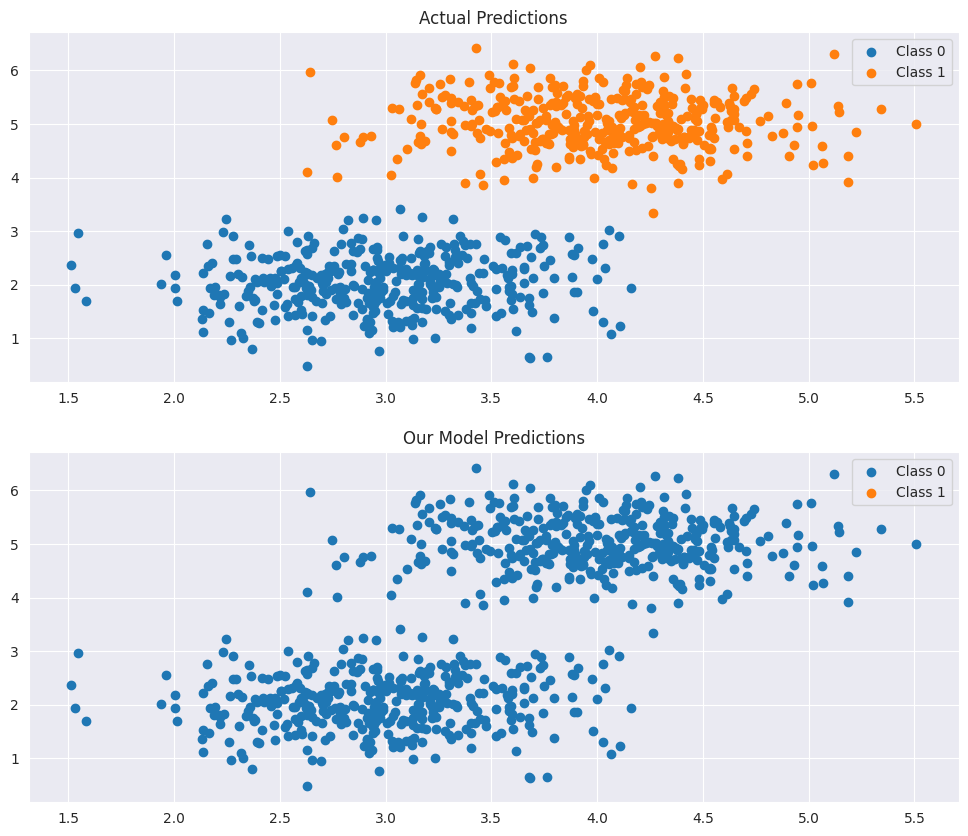

In [40]:
model.eval()
model_prediction = model(X_test)

model_prediction = np.where(model_prediction.cpu() > 0.5, 1, 0)
model_prediction = model_prediction.reshape(-1)
print("Accuracy Score on test data ==>> {}%".format(accuracy_score(model_prediction, y_test.cpu()) * 100))


y_test = y_test.cpu()
X_test = X_test.cpu()
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
y_test = y_test.view(-1)

# True Predictions
ax[0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='Class 0', cmap=cm.coolwarm)
ax[0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='Class 1', cmap=cm.coolwarm)
ax[0].set_title('Actual Predictions')
ax[0].legend()

# Models Predictions
ax[1].scatter(X_test[model_prediction==0, 0], X_test[model_prediction==0, 1], label='Class 0', cmap=cm.coolwarm)
ax[1].scatter(X_test[model_prediction==1, 0], X_test[model_prediction==1, 1], label='Class 1', cmap=cm.coolwarm)
ax[1].set_title('Our Model Predictions')
ax[1].legend()